In [31]:
import sqlite3

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [32]:
db_name="IoT_DataBase.db"
conn=sqlite3.connect(db_name)
curs = conn.cursor()

In [33]:
sql='''SELECT * FROM Temperature_Data '''
curs.execute(sql)
data=curs.fetchall()

In [34]:
def data_processing(data):
    processed_data = []
    sum_temperature_values_per_minute = 0
    current_minute = data[0][2].split(":")[1]
    counter = 0
    for i in range(len(data)):
        if data[i][2].split(":")[1] == current_minute:
            sum_temperature_values_per_minute += data[i][3]
            counter += 1
            #print(current_minute)
            #print(sum_temperature_values_per_minute)
            #print(counter)
        else:
            temperature_avg = sum_temperature_values_per_minute/counter
            processed_data.append((data[i-1][2].split(":")[0]+":"+data[i-1][2].split(":")[1], temperature_avg))
            current_minute = data[i][2].split(":")[1]
            #print(current_minute)
            sum_temperature_values_per_minute = 0
            counter = 0
            #print(sum_temperature_values_per_minute)
            #print(counter)
    temperature_avg = sum_temperature_values_per_minute/counter
    processed_data.append((data[i-1][2].split(":")[0]+":"+data[i-1][2].split(":")[1], temperature_avg))
    return processed_data

In [36]:
processed_data = data_processing(data)
date_time_per_minute=[]
temperature_val=[]
tmpDescription=[]
for i in range(len(processed_data)):
    date_time_per_minute.append(processed_data[i][0])
    temperature_val.append(processed_data[i][1])
    tmpDescription.append(data[i][-1])

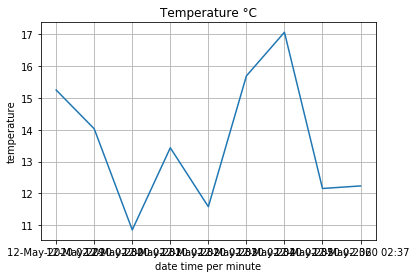

In [37]:
time = np.array(date_time_per_minute)
temper = np.array(temperature_val)

fig, ax = plt.subplots()
ax.plot(time, temper)

ax.set(xlabel='date time per minute', ylabel='temperature',
       title='Temperature °C')
ax.grid()

fig.savefig("temperature_viz.png")
plt.show()

In [38]:
prcnt=[]
prcnt.append(tmpDescription.count('very cold')*len(tmpDescription)/100)
prcnt.append(tmpDescription.count('cold')*len(tmpDescription)/100)
prcnt.append(tmpDescription.count('normal')*len(tmpDescription)/100)
prcnt.append(tmpDescription.count('hot')*len(tmpDescription)/100)
prcnt.append(tmpDescription.count('very hot')*len(tmpDescription)/100)

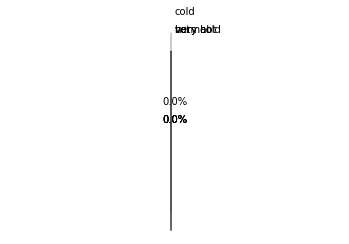

In [39]:
labels = ['very cold','cold', 'normal', 'hot', 'very hot']
sizes = prcnt
explode = (0, 0.1, 0, 0,0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()